In [59]:
import scipy as sp
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.manifold import MDS


1.091530214589213


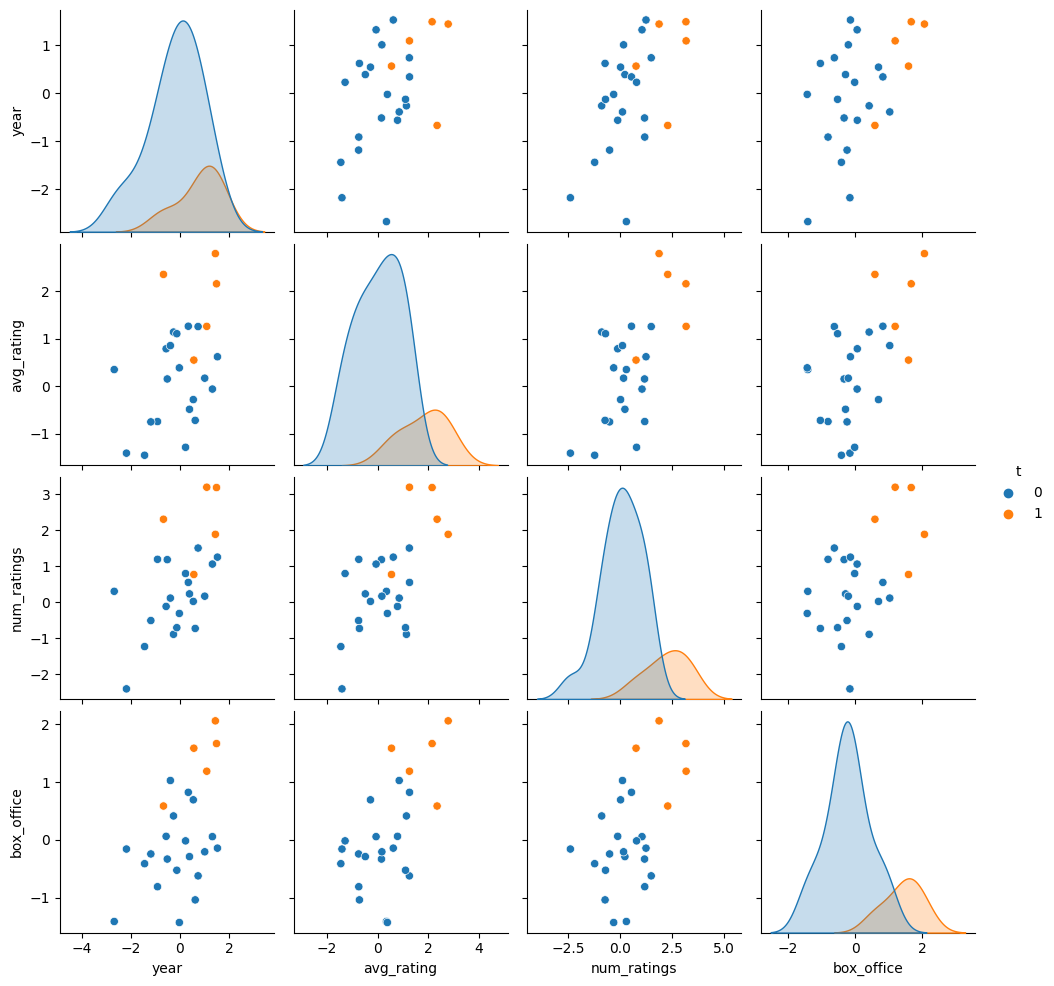

In [133]:
# year, avg_rating, num_ratings, box office dollars
cov = [
        [1, 0, .3, .2],
        [0, 1, .5, .4],
        [.3, .5, 1, .2],
        [.2, .4, .2, 1]
    ]
dist1 = sps.multivariate_normal(
    mean=[0,0,0, 0],
    cov=cov
)
dist2 = sps.multivariate_normal(
    mean=[2,2,2,2],
    cov=cov
)

nd1 = 20
nd2 = 5
samples = np.concatenate(
    (dist1.rvs(size=nd1, random_state=1), dist2.rvs(size=nd2, random_state=1))
)
w = samples[:,0]
x = samples[:,1]
y = samples[:,2]
z = samples[:,3]
t = np.concatenate( (np.repeat(0, nd1), np.repeat(1,nd2)))
df = pd.DataFrame(data={'year':w, 'avg_rating':x, 'num_ratings':y, 'box_office':z, 't': t})
sns.pairplot(df, hue='t')

/usr/local/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


<Axes: xlabel='mdsx', ylabel='mdsy'>

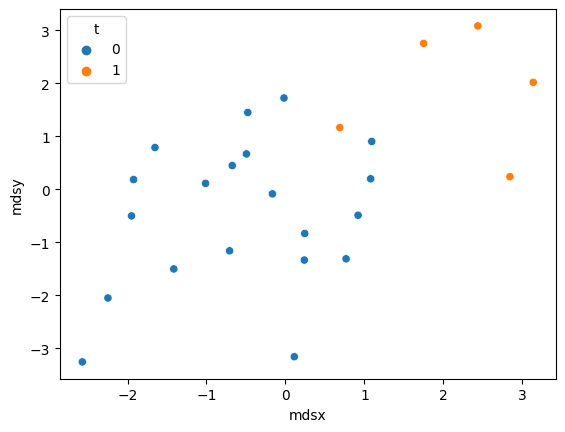

In [132]:
mds = MDS(n_components=2, metric=True, random_state=2,  dissimilarity="euclidean")
H_mds = mds.fit_transform(samples)

sns.scatterplot(pd.DataFrame(data={
    'mdsx': H_mds[:,0], 
    'mdsy': H_mds[:,1], 
    't': t,
    'w': w,
    'x': x,
    'y': y,
    'z': z
}), x='mdsx', y='mdsy', hue='t')
